For my final project I have chosen a wine description dataset from kaggle. 


Dataset found at https://www.kaggle.com/datasets/zynicide/wine-reviews/code?resource=download

In [25]:
#import statements
#will plot with seaborn and matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
#load data

df = pd.read_csv('winemag-data-130k-v2.csv')

In this first section I will to a high level examination of the data.

In [3]:
#examine the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [5]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [6]:
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Appears there are quite a few null fields in the data. Particularily with reference to who described the wines (name, twitter handle). Remove uninteresting rows. For this project I will focus on 'country', 'description', 'points', 'price', and 'variety'.

In [7]:
df = df.drop(columns = ['Unnamed: 0', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'winery'])

In this next section I will perform some basic graphing of the data to get a better sense of the data.

In [8]:
#where are the reviewed wines from

df.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

Text(0.5, 1.0, 'Wines reviewed by country of origin')

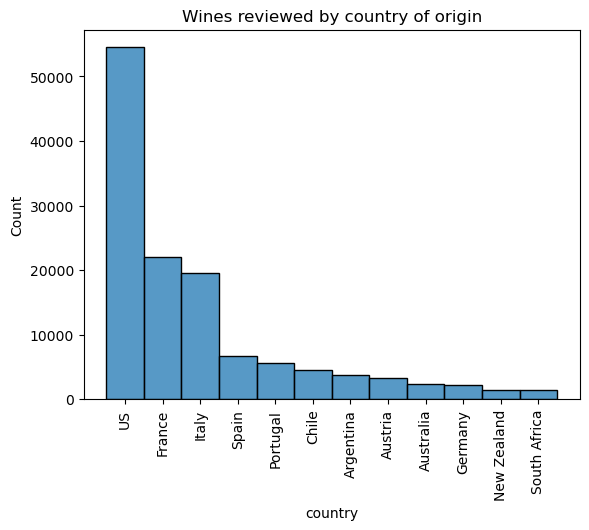

In [9]:
#straightforward histplot is useless as there are too many countries, output looks cluttered. Use a cutoff of 1000.

top_countries = df['country'].value_counts()>1000
df_top_countries = pd.DataFrame()

for country in top_countries.keys():
    if top_countries[country] == True: 
        df_top_countries = df_top_countries.append(df.query('country == @country'))

ax = sns.histplot(data=df_top_countries['country'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Wines reviewed by country of origin')

So from these data US based wines were by far the most reviewed.

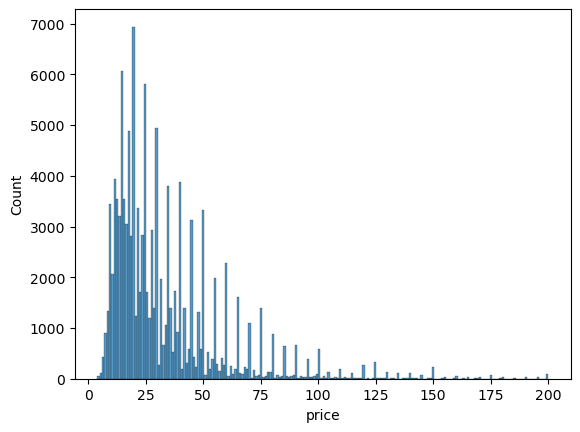

In [10]:
#price of wine
# from above describe function we know there are some stupidly priced wines (max is $3000)

#only incldue wines priced $200 and below (the $3000 bottle of wine skews the axis)
ax = sns.histplot(data=df.query('price <= 200').price)

The majority of wines reviewed are $25 and under with a pretty steep drop off afterwords. A common anecdote is that there is a big difference betweeen a $8 bottle of wine and a $35 bottle wine. But after that the increase in quality becomes negligible. Let's investigate.  

In [31]:

#group wines by price and calculate median. Used median as there is quite a bit of data and I want to minimzie the effects of outliers.
price_groups =  df.groupby(["price"])["points"].median()

fig = px.line(df.groupby(["price"])["points"].median(), title = 'Median Points vs Price of Wine')

fig.update(layout_xaxis_range = [0,1000])

According to this, the anecdote is partially correct. The quality of wine does rise quickly initially as price goes up. However, it does not level off until ~$100 a bottle. 

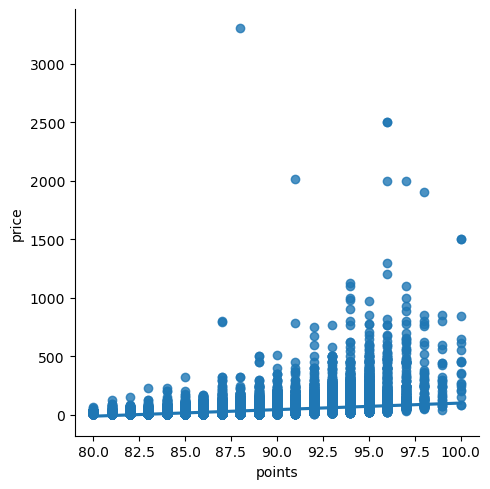

In [11]:
sns.lmplot(x = "points", y = "price", data = df)

Resize axes to better visualize.

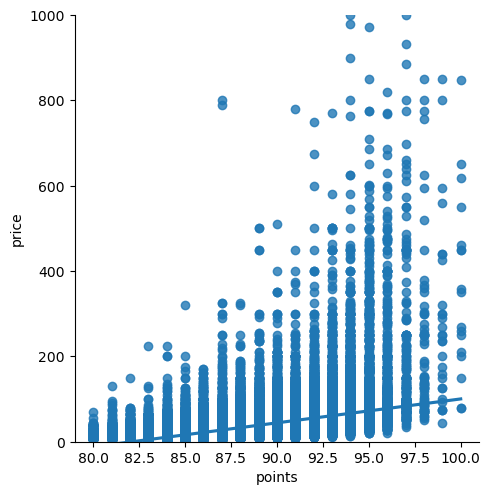

In [12]:
#reset axes limits to view correlation better
ax = sns.lmplot(x = "points", y = "price", data = df)
ax.set(ylim=(0, 1000))

As already established, price has a definite correlation with points, to explore this correlation generate a correlation heatmap. This will require one hot encoding of the categorical variables.

points                      0.057667
price                       0.030092
Argentina                  -0.166257
Australia                  -0.146057
Austria                    -0.137846
Chile                      -0.253241
France                     -0.555029
Germany                    -0.186326
Italy                      -0.296175
New Zealand                -0.155435
Portugal                   -0.084291
South Africa               -0.123124
Spain                      -0.148469
US                          1.000000
Bordeaux-style Red Blend   -0.193405
Cabernet Sauvignon          0.180037
Chardonnay                  0.025064
Merlot                      0.089597
Pinot Noir                  0.185261
Red Blend                  -0.161751
Riesling                   -0.122012
Rosé                       -0.138696
Sauvignon Blanc            -0.063113
Syrah                       0.118041
Name: US, dtype: float64


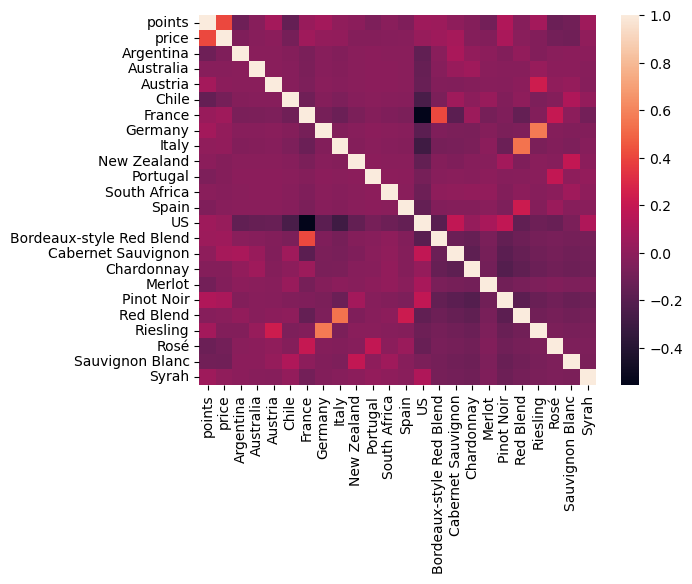

In [35]:
#One hot encode categorical variables and generate correlation heatmap

df_correlation = df_top_countries.drop(columns = ['description'])

top_varieties = df_correlation['variety'].value_counts()[:10].index.tolist()

df_correlation= df_correlation[df_correlation['variety'].isin(top_varieties)]

one_hot_country = pd.get_dummies(df_correlation['country'])
one_hot_variety = pd.get_dummies(df_correlation['variety'])

df_correlation = df_correlation.drop('country',axis = 1)
df_correlation = df_correlation.drop('variety',axis = 1)

df_correlation = pd.concat([df_correlation, one_hot_country], axis=1)
df_correlation = pd.concat([df_correlation, one_hot_variety], axis=1)

corr = df_correlation.corr()
sns.heatmap(corr)
print(corr.US)

Price and points has a lower correlation than I would have presumed at 0.41. This would represent a "low positive" correlation. No country (top 12 countries reviewed) in paticular has the best wines (of the top 10 varieties), or more expensive wines. Also as expected we can see that some regions produce specific varieties more often (like France being correlated with a Bordeaux-style Red Blend). 

Not sure what to make with all the negative correlations of the US with other countries where there are numerous "moderate" to "substantial" negative correlations...

Next generate a correlation matrix for all varieties and all countries. Pull out the top 15 correlations (positive or negative).

In [33]:
#Running through complete correlation matrix. Will not graph as this would be impossible to read.

df_corr_all = df.drop(columns = ['description'])

one_hot_country_all = pd.get_dummies(df_corr_all['country'])
one_hot_variety_all = pd.get_dummies(df_corr_all['variety'])

df_corr_all = df_corr_all.drop('country',axis = 1)
df_corr_all = df_corr_all.drop('variety',axis = 1)
# Join the encoded df
#df_correlation = df_correlation.join(one_hot_country)
#df_correlation = df_correlation.join(one_hot_variety)

df_corr_all = pd.concat([df_corr_all, one_hot_country_all], axis=1)
df_corr_all = pd.concat([df_corr_all, one_hot_variety_all], axis=1)

corr_all = df_correlation.corr()

#sns.heatmap(corr)
print('Top correlations to price')
#skip top result, as this will always be itself
print(corr_all.price.sort_values(ascending = False, key=abs)[1:15])
print('--------------------------------')
print('Top correlations to points')
print(corr_all.points.sort_values(ascending = False, key=abs)[1:15])

Top correlations to price
points                      0.405285
Sauvignon Blanc            -0.107730
Pinot Noir                  0.099103
Rosé                       -0.096733
Chile                      -0.087766
Cabernet Sauvignon          0.087507
France                      0.062308
Bordeaux-style Red Blend    0.057016
Argentina                  -0.052239
Merlot                     -0.040393
Riesling                   -0.038782
Chardonnay                 -0.034990
New Zealand                -0.033238
Portugal                   -0.033145
Name: price, dtype: float64
--------------------------------
Top correlations to points
price              0.405285
Chile             -0.151673
Rosé              -0.128684
Pinot Noir         0.123727
Argentina         -0.113181
Sauvignon Blanc   -0.101605
Merlot            -0.094549
Austria            0.078777
Riesling           0.075728
Germany            0.075664
Portugal          -0.062745
US                 0.057667
Spain             -0.053667
Syra

All correlations are pretty weak (apart from price and points). Best we can say is sauvingnon blancs are ever so slightly correlated with being cheaper, and chile produces ever so slighly lower quality wine. But I stress, these are very weak correlations.

Next create a boxplot to better visualize the relationship between country of origin and points. 

Text(0.5, 1.0, 'Wines scores by country of origin (most reviewed countries)')

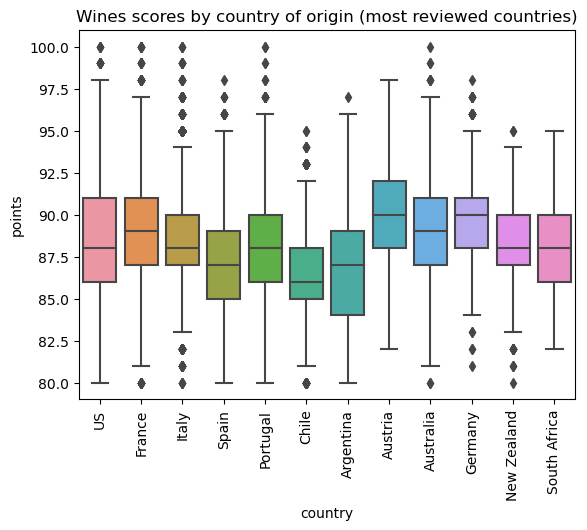

In [30]:
ax = sns.boxplot( y=df_top_countries["points"], x=df_top_countries["country"] );
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Wines scores by country of origin (most reviewed countries)')

Not too much to take away from the boxplot, all countries appear to have comporable wine qualities. South America (Argentine, Chile) does appear to on average produce lower quality wines. 

In [31]:
####################### UNCOMMENT IF NECESSARY ##########################
#below install the wordclouds module


# import sys
# !{sys.executable} -m pip install wordcloud

Next investigate the relationship between the words used in description of the wine and the quality and price. 

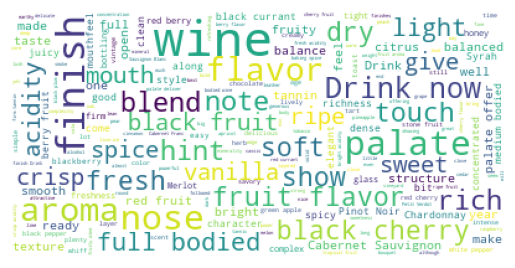

In [32]:
#use the wordcloud module of create a wordcloud for the words used in the description of the wines

from wordcloud import WordCloud


text = ' '.join(df['description'])
wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Top correlations between words used in a review and price
rich            0.095499
wine            0.069307
flavor         -0.069030
light          -0.068080
fresh          -0.062449
black cherry    0.055677
show            0.054189
finish         -0.045727
Name: price, dtype: float64
--------------------------------
Top correlations between words used in a review and points
rich            0.197714
wine            0.113986
show            0.092840
flavor         -0.092135
black cherry    0.089659
light          -0.080708
soft           -0.067422
palate          0.045125
Name: points, dtype: float64


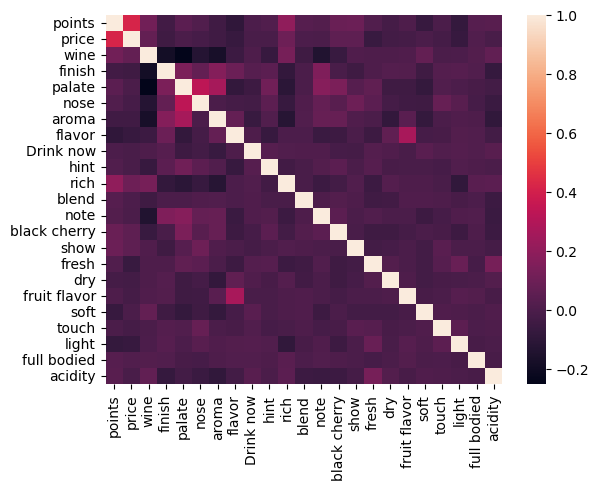

In [35]:
#do words used in description correlate with price or points?

top_words = wordcloud.words_

i=0
words = []

for key in top_words:
    words.append(key)
    i=i+1
    if i > 20:
        break

test =1

for i in range(len(words)):
    word = words[i]
    df[word] = df['description'].str.contains(word)

pd_word_correlation = df.drop(columns = ['description'])

corr = pd_word_correlation.corr()
sns.heatmap(corr)
print('Top correlations between the 20 most common words used in a description and price')
#take [4:8] to get ride of correlations of "point", "price"
print(corr.price.sort_values(ascending = False, key=abs)[2:10])
print('--------------------------------')
print('Top correlations between the 20 most common words used in a description and points')
print(corr.points.sort_values(ascending = False, key=abs)[2:10])


So maybe they reserve some "special" words for the good stuff, which are correlated highly with either better or more expensive wine, so let's open it up, but don't graph as it will be far too large.

In [36]:
#do words used in reviews correlate with price or points?

top_words = wordcloud.words_

i=0
words = []

for key in top_words:
    words.append(key)
    i=i+1
    if i > 200:
        break

for i in range(len(words)):
    word = words[i]
    df[word] = df['description'].str.contains(word)

pd_word_correlation = df.drop(columns = ['description'])

corr = pd_word_correlation.corr()
#sns.heatmap(corr)
print('Top correlations between most common 200 words used in a description and price')
#skip top results, will always be price and points
print(corr.price.sort_values(ascending = False, key=abs)[2:15])
print('--------------------------------')
print('Top correlations between most common 200 words used in a description and points')
print(corr.points.sort_values(ascending = False, key=abs)[2:15])


Top correlations between words used in a review and price
year         0.139289
age          0.131523
tannin       0.127422
power        0.125672
powerful     0.101933
structure    0.098741
rich         0.095499
vintage      0.093123
vineyard     0.086585
dense        0.084128
dark         0.083861
Drink        0.082657
complex      0.080881
Name: price, dtype: float64
--------------------------------
Top correlations between words used in a review and points
rich            0.197714
year            0.180116
complex         0.176457
simple         -0.171955
power           0.169907
age             0.168915
structure       0.165828
vineyard        0.160801
fine            0.157482
concentrated    0.150107
Drink           0.146606
full            0.145216
dark            0.136159
Name: points, dtype: float64


So what is the takeaway from this analysis. If we look up an interpretation table for correlation coefficients we will find at best there is a "very low" to "low" correlation, depending on your definition, between the words used in a review of a wine and either the price or the points. Somewhat reassuringly the quality of the wine is overall more highly correlated to the words used in a review than the price. 

It is now time for some sage consumer advice for your high quality wine hunting escapades. When searching for the perfect bottle, it would be prudent to avoid expensive wines that contain the words: powerful, vintage, tannin and dense. These appear in the top 15 for price, but not for points, meaning they are correlated with the wine being expensive, but not necesessarily being highly rated.

What I wanted to do was see if words in the reviews were more highly correlated to the variety of wine than the quality of the wine but that would require going down a statistics rabbit-hole that I didn't have time to complete. This would have the funny implication that it would be just as meaingful to put the dicitonary definition of "merlot" on the bottle, than to write one of those unique descriptions.

So in conclusion, if you want to impress your friends, describe your wine as follows "This is a rich and complex wine, from a particularily great year, boasting power and age, with a full concentrated structure". 

Added bonus, typical expensive wine description: "Aged to perfection, from the DAT110 vineyard, this dark, complex and dense wine boasts powerful tannins and a rich structure we're sure you'll love."  